<a href="https://colab.research.google.com/github/amycelliott/DMP_LP_2022/blob/main/DMP_LP_2022_Target_Country_Current_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Pandas - Only need to run once

In [1]:
# Install Pandas
#!pip install -U pandas~=1.2.4
# plotly is used for simple visualizations.
#!pip install -U plotly
# Import Pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Data from GitHub



Narrow down to specific columns

**Key Fields**
* iso_code
* country
* year

**Energy Consumption**
* biofuel_consumption
* coal_consumption
* fossil_fuel_consumption
* gas_consumption
* hydro_consumption
* low_carbon_consumption
* nuclear_consumption
* oil_consumption
* other_renewable_consumption
* primary_energy_consumption
* renewables_consumption
* solar_consumption
* wind_consumption

In [2]:

# Import the files that will be used
from tempfile import mkdtemp
from urllib.request import urlretrieve

tmp_dir = mkdtemp()

# Upload All Data
all_data_csv_path = f"{tmp_dir}/world_energy_consumption_all.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/World_Energy_Consumption.csv?raw=true", all_data_csv_path)

df_all_data = pd.read_csv(
    all_data_csv_path, 
    # Only pull in columns needed
    usecols=["iso_code","country","year","biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption","solar_consumption","wind_consumption"],
)

df_renewables = pd.read_csv(
    all_data_csv_path, 
    # Only pull in columns needed
    usecols=["country","year","renewables_consumption"],
)

df_fossil_fuel = pd.read_csv(
    all_data_csv_path, 
    # Only pull in columns needed
    usecols=["country","year","fossil_fuel_consumption"],
)

df_low_carbon = pd.read_csv(
    all_data_csv_path, 
    # Only pull in columns needed
    usecols=["country","year","low_carbon_consumption"],
)


# after loading, we can explore the data in all different ways pandas support
# No need to do this yet
df_all_data = df_all_data.sort_values('year', ascending=False)
df_renewables = df_renewables.sort_values('year', ascending=False)
df_fossil_fuel = df_fossil_fuel.sort_values('year', ascending=False)
df_low_carbon = df_low_carbon.sort_values('year', ascending=False)

# We have only been looking at data from 2000 forward (and 2020 data), filter out the older data
df_all_data = df_all_data.query('`year` >= 2000')
df_all_data = df_all_data.query('`year` != 2020')

df_renewables = df_renewables.query('`year` >= 2000')
df_renewables = df_renewables.query('`year` != 2020')

df_fossil_fuel = df_fossil_fuel.query('`year` >= 2000')
df_fossil_fuel = df_fossil_fuel.query('`year` != 2020')

df_low_carbon = df_low_carbon.query('`year` >= 2000')
df_low_carbon = df_low_carbon.query('`year` != 2020')

# Copy data to two different groups to look at Energy Usage by those groups

df_all_data_obvious = df_all_data.copy()
df_all_data_growth = df_all_data.copy()

# Only look at the top countries we are interested in
          # Obvious Choices
          # United States - Has dropped from #1 to #2 - however, it is still one of the top electricy usage
          # China - #2 to #1 - Shows growth and has high usage
          # Canada - Increased ranking slightly and a solid top choice

          # Areas of Growth
          # India - #6 to #3
          # South Korea
          # Brazil
          # Iran
          # Saudi Arabia
          # Indonesia
          # Turkey
          # Thalind Thailand
          # United Arab Emirates
          # Vietnam
df_all_data = df_all_data[df_all_data['country'].isin(['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam'])]
df_all_data_obvious = df_all_data_obvious[df_all_data_obvious['country'].isin(['United States','China','Canada'])]
df_all_data_growth = df_all_data_growth[df_all_data_growth['country'].isin(['India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam'])]

# Also narrow down the df_renewables, df_fossil_fuel to the two groups of countries
df_renewables = df_renewables[df_renewables['country'].isin(['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam'])]
df_fossil_fuel = df_fossil_fuel[df_fossil_fuel['country'].isin(['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam'])]
df_low_carbon = df_low_carbon[df_low_carbon['country'].isin(['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam'])]

#Verify we filtered out older data
all_data_agg_year = df_all_data.agg({'year': ['min', 'max','count']})
print(all_data_agg_year)


       year
min    2000
max    2019
count   260


# Evaluate NULL Values

Note: Evaluate additional fields, the ones ending in _consumption all appeared to be our best bet.  

The fields selected have 9 null values - this is all for 2020 data, so we will also exclude that data.


In [3]:
df_all_data.isnull().sum()

iso_code                       0
country                        0
year                           0
biofuel_consumption            0
coal_consumption               0
fossil_fuel_consumption        0
gas_consumption                0
hydro_consumption              0
low_carbon_consumption         0
nuclear_consumption            0
oil_consumption                0
other_renewable_consumption    0
primary_energy_consumption     0
renewables_consumption         0
solar_consumption              0
wind_consumption               0
dtype: int64

In [4]:
df_all_data[df_all_data['biofuel_consumption'].isnull()]

,iso_code,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption


# Prep Data for Visualizations

In [5]:
# Sum up all Energy Usage by year
df_all_data_sum_by_year = df_all_data.groupby(['year'])['biofuel_consumption','coal_consumption','fossil_fuel_consumption','gas_consumption','hydro_consumption','low_carbon_consumption','nuclear_consumption','oil_consumption','other_renewable_consumption','primary_energy_consumption','renewables_consumption','solar_consumption','wind_consumption'].sum().reset_index()
df_all_data_obvious_sum_by_year = df_all_data_obvious.groupby(['year'])['biofuel_consumption','coal_consumption','fossil_fuel_consumption','gas_consumption','hydro_consumption','low_carbon_consumption','nuclear_consumption','oil_consumption','other_renewable_consumption','primary_energy_consumption','renewables_consumption','solar_consumption','wind_consumption'].sum().reset_index()
df_all_data_growth_sum_by_year = df_all_data_growth.groupby(['year'])['biofuel_consumption','coal_consumption','fossil_fuel_consumption','gas_consumption','hydro_consumption','low_carbon_consumption','nuclear_consumption','oil_consumption','other_renewable_consumption','primary_energy_consumption','renewables_consumption','solar_consumption','wind_consumption'].sum().reset_index()

# Print results of both groups
df_all_data_sum_by_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
0,2000,107.051,17991.562,49460.429,10042.791,3617.926,6823.370,2814.947,21426.078,259.161,56283.799,4008.424,1.582,22.703
1,2001,105.963,18300.951,49816.550,9968.007,3382.317,6678.773,2892.831,21547.591,268.063,56495.321,3785.939,1.773,27.824
2,2002,122.690,19283.779,51847.421,10526.029,3648.081,7040.062,2943.575,22037.612,285.591,58887.483,4096.486,1.899,38.224
3,2003,137.998,21440.139,54791.266,10607.336,3677.338,7098.421,2949.976,22743.791,288.188,61889.686,4148.443,1.965,42.955
4,2004,167.627,23528.216,58532.853,10980.957,3983.759,7577.480,3069.310,24023.679,295.164,66110.335,4508.170,2.211,59.410
5,2005,191.420,26150.671,61651.680,11210.543,4171.701,7817.779,3071.818,24290.466,305.597,69469.459,4745.962,2.378,74.866
6,2006,233.480,27736.969,63816.406,11440.778,4381.366,8153.092,3103.070,24638.662,317.289,71969.726,5050.022,2.719,115.169
7,2007,305.820,29772.042,67275.880,12307.404,4493.537,8420.512,3126.300,25196.436,340.972,75696.535,5294.212,3.763,150.120
8,2008,416.145,30276.626,67866.631,12824.949,4853.101,9022.258,3148.024,24765.056,361.756,76889.069,5874.233,5.912,237.320
9,2009,468.699,30623.102,68086.121,12882.745,4845.558,9147.279,3090.327,24580.272,396.301,77233.480,6056.952,8.352,338.040


# Visualizations for Energy Consumption

* First Graph - Filtered by Obvious and Growth Countries
* Second Graph - Filtered by Obvious Countries
* Third Graph - Filtered by Growth Countries

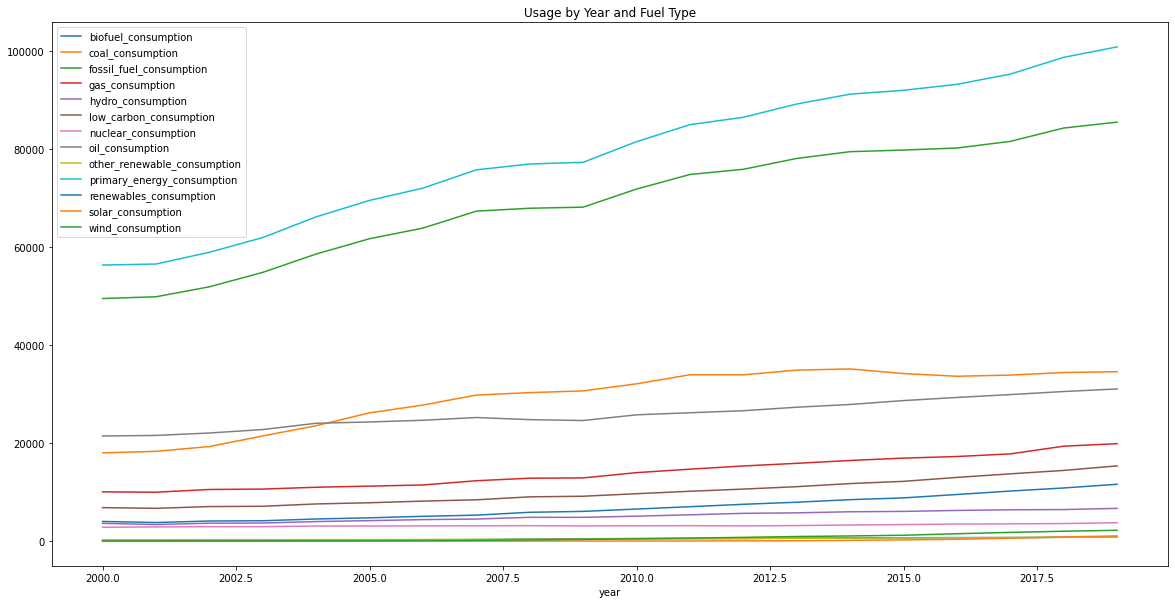

In [6]:
df_all_data_sum_by_year.plot(
    #kind='area', stacked=True, #I didn't like how this looked compared to Line
    x="year", 
    # All columns
    y=["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption","solar_consumption","wind_consumption"],
    # Select columns
    #y=["biofuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","renewables_consumption","solar_consumption","wind_consumption"],
    title='Usage by Year and Fuel Type', figsize=(20,10)
    )

plt.show()

# Groupings to look at
# fossil_fuel_consumption, renewables_consumption
# low_carbon_consumption (Nucular + Renewables)

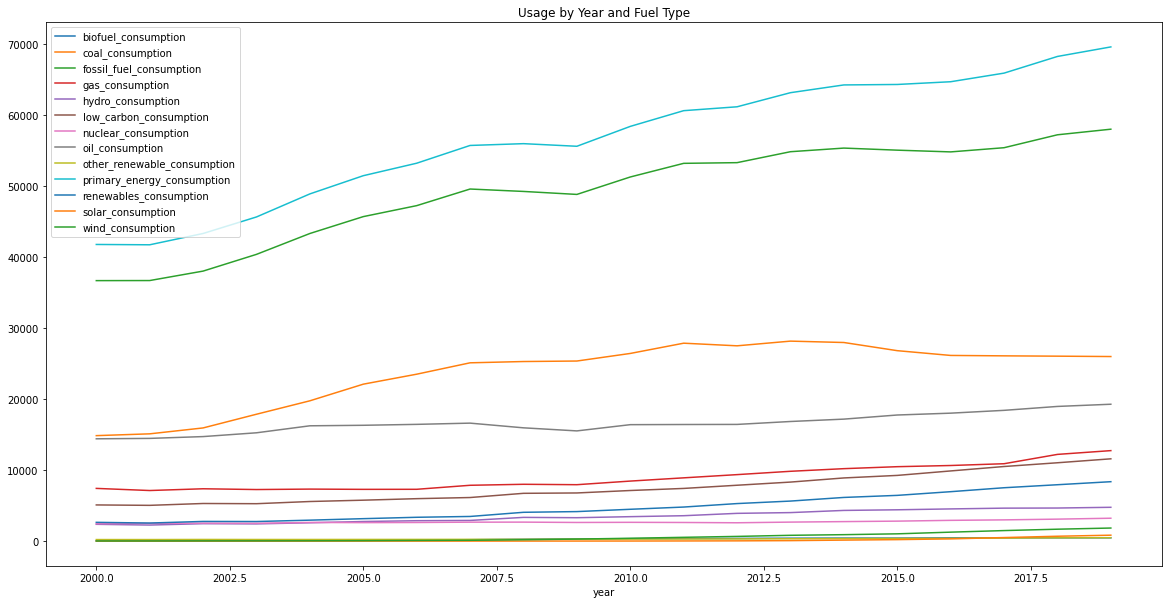

In [7]:
df_all_data_obvious_sum_by_year.plot(
    #kind='area', stacked=True, #I didn't like how this looked compared to Line
    x="year", 
    # All columns
    y=["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption","solar_consumption","wind_consumption"],
    # Select columns
    #y=["biofuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","renewables_consumption","solar_consumption","wind_consumption"],
    title='Usage by Year and Fuel Type', figsize=(20,10)
    )

plt.show()

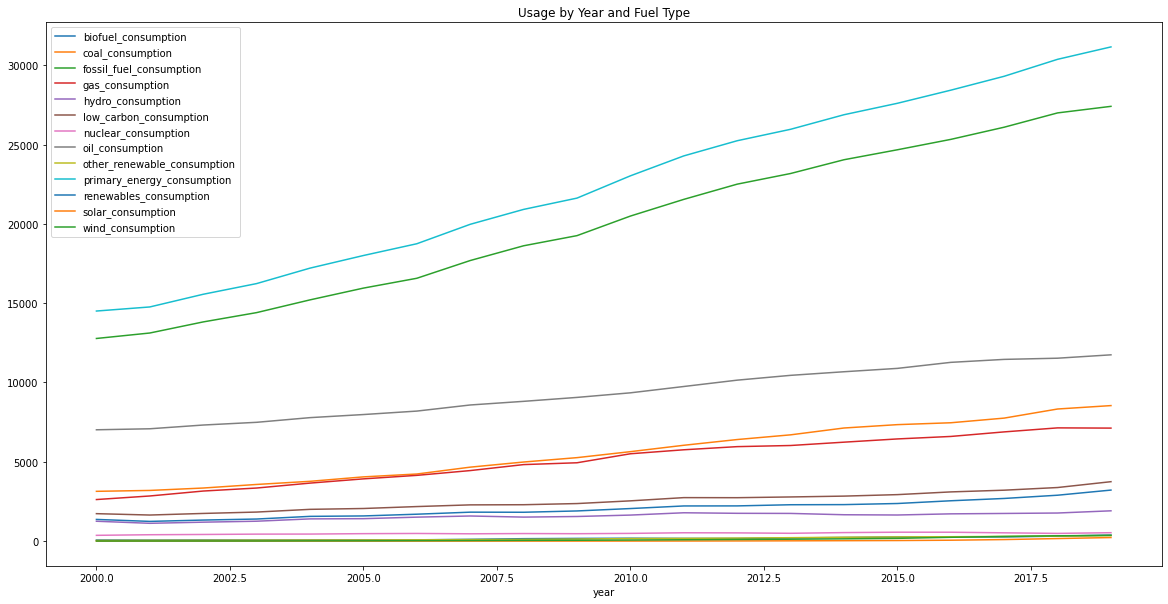

In [8]:
df_all_data_growth_sum_by_year.plot(
    #kind='area', stacked=True, #I didn't like how this looked compared to Line
    x="year", 
    # All columns
    y=["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption","solar_consumption","wind_consumption"],
    # Select columns
    #y=["biofuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","renewables_consumption","solar_consumption","wind_consumption"],
    title='Usage by Year and Fuel Type', figsize=(20,10)
    )

plt.show()

Basic Obversations: 

* fossil_fuel_consumption <-- Largest overall Fuel Consumption

* coal_consumption <-- Had some interesting increases around 2002 but started to decrease.  Might be interesting to plot this by country.  Looks like obvious choices are decreasing in usage but the growth are slighty increasing.

* gas_consumption - Gas is slightly decreasing for both countries, this would not be an energy source to target.

# Renewables by Country

df_renewables <-- Just looks at Renewables by country.  Pivot by Country and plot.

Observations 
* China - Good area to target for Renewables
* Canada - Not growing in Renewables <-- I found this interesting
* Brazil, India, and Turkey are good growth areas to target for Renewables

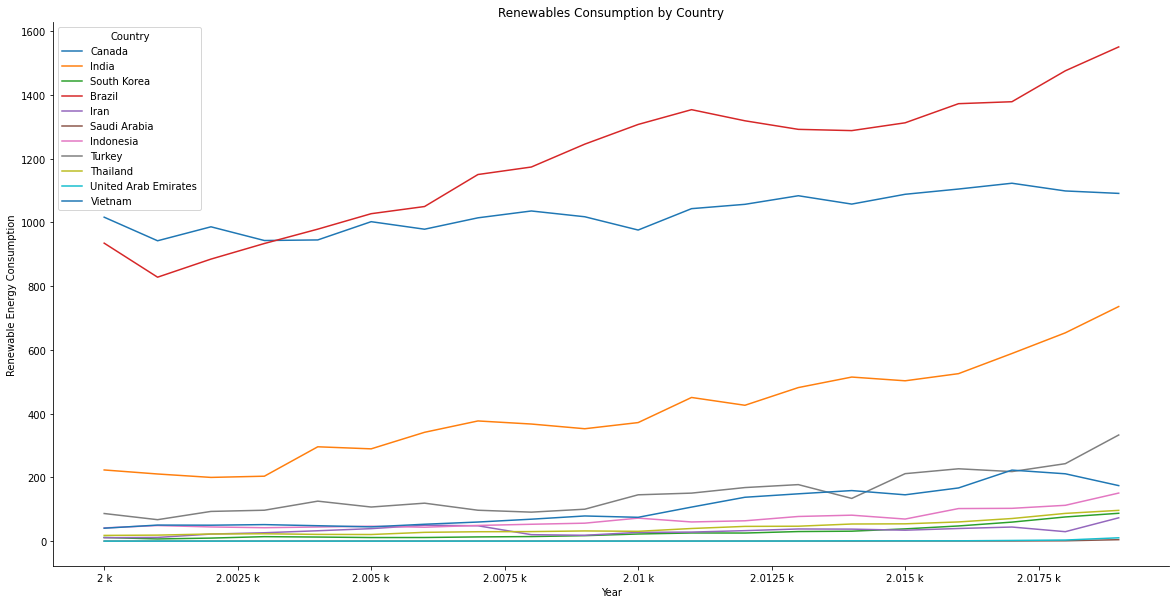

In [11]:
# Pivot Data
df_renewables_pivot = df_renewables.pivot_table(
    index='year',
    columns='country', 
    values='renewables_consumption',
    margins=True
    )

# First record values show "All" and should get deleted
df_renewables_pivot = df_renewables_pivot.drop('All').head(25)
#df_renewables_pivot = df_renewables_pivot.query('`country` != "All"')

# for kind - area or line work best
from matplotlib import ticker
ax = df_renewables_pivot.plot(
    kind='line', #stacked=True,
    # All countries
    #y=["United States","China","Canada","India","South Korea","Brazil","Iran","Saudi Arabia","Indonesia","Turkey","Thailand","United Arab Emirates","Vietnam"],
    # Remove some of the top ones to see the change in the lower ones
    y=["Canada","India","South Korea","Brazil","Iran","Saudi Arabia","Indonesia","Turkey","Thailand","United Arab Emirates","Vietnam"],
    title='Renewables Consumption by Country', figsize=(20,10)
)

# formatting
ax.set(xlabel='Year', ylabel='Renewable Energy Consumption')
ax.legend(title='Country')

# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
  ax.spines[spine].set_visible(False)

# Fossil Fuel by Country

df_fossil_fuel <-- Similar to Renewables

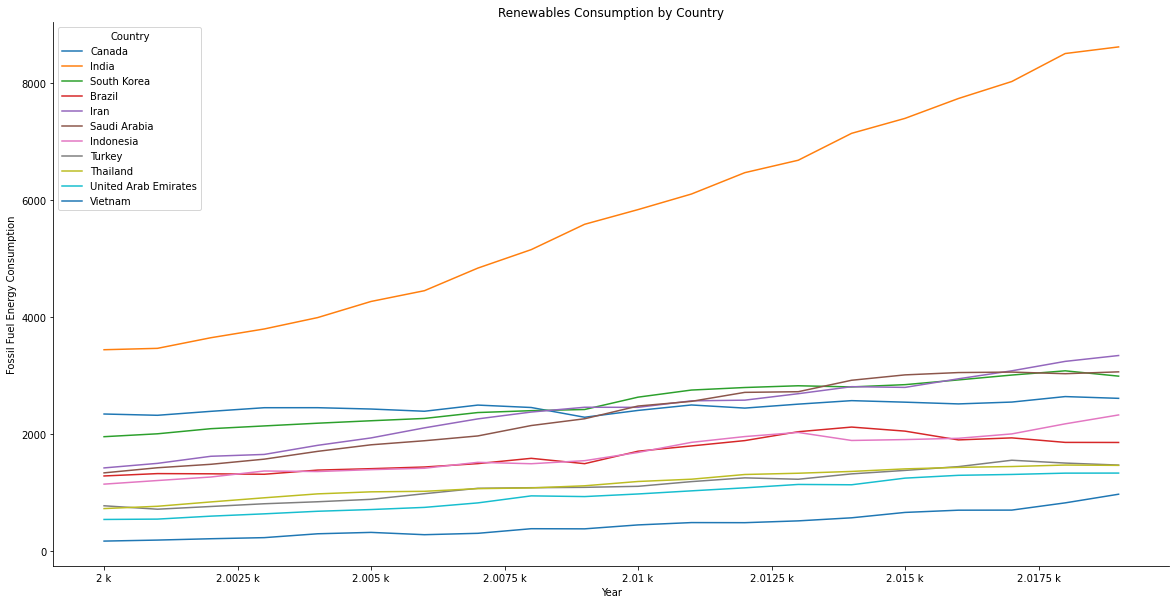

In [12]:
# Pivot Data
df_fossil_fuel_pivot = df_fossil_fuel.pivot_table(
    index='year',
    columns='country', 
    values='fossil_fuel_consumption',
    margins=True
    )

# First record values show "All" and should get deleted
df_fossil_fuel_pivot = df_fossil_fuel_pivot.drop('All').head(25)
#df_fossil_fuel_pivot = df_fossil_fuel_pivot.query('`country` != "All"')

# for kind - area or line work best
from matplotlib import ticker
ax = df_fossil_fuel_pivot.plot(
    kind='line', #stacked=True,
    # All countries
    #y=["United States","China","Canada","India","South Korea","Brazil","Iran","Saudi Arabia","Indonesia","Turkey","Thailand","United Arab Emirates","Vietnam"],
    # Remove some of the top ones to see the change in the lower ones
    y=["Canada","India","South Korea","Brazil","Iran","Saudi Arabia","Indonesia","Turkey","Thailand","United Arab Emirates","Vietnam"],
    title='Renewables Consumption by Country', figsize=(20,10)
)

# formatting
ax.set(xlabel='Year', ylabel='Fossil Fuel Energy Consumption')
ax.legend(title='Country')

# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
  ax.spines[spine].set_visible(False)

# Low Carbon by Country

df_low_carbon

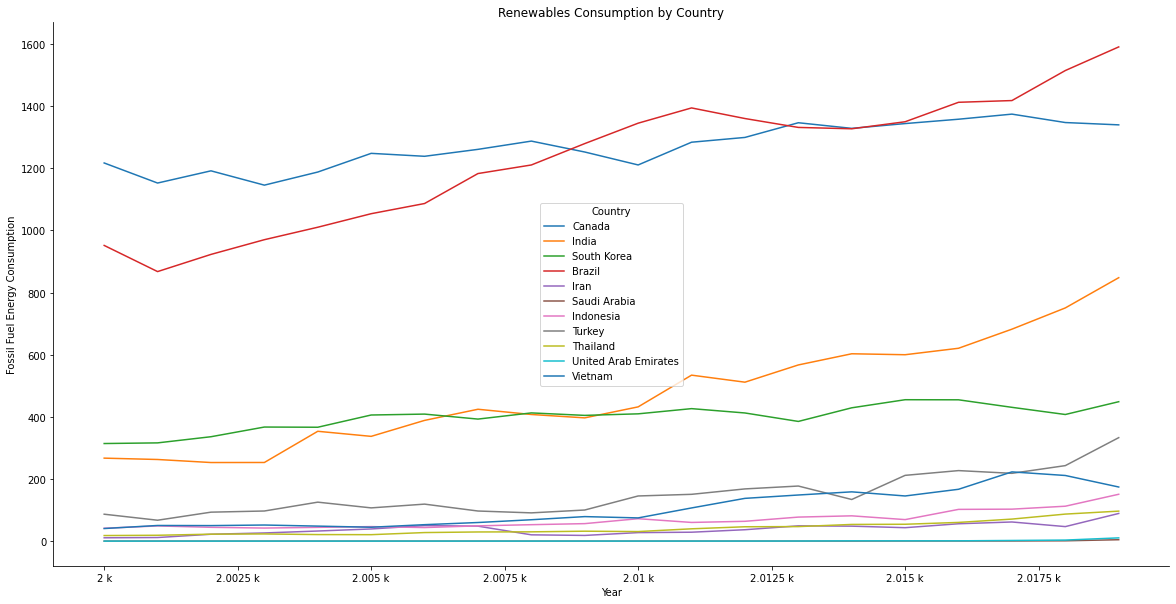

In [14]:
# Pivot Data
df_low_carbon_pivot = df_low_carbon.pivot_table(
    index='year',
    columns='country', 
    values='low_carbon_consumption',
    margins=True
    )

# First record values show "All" and should get deleted
df_low_carbon_pivot = df_low_carbon_pivot.drop('All').head(25)
#df_low_carbon_pivot = df_low_carbon_pivot.query('`country` != "All"')

# for kind - area or line work best
from matplotlib import ticker
ax = df_low_carbon_pivot.plot(
    kind='line', #stacked=True,
    # All countries
    #y=["United States","China","Canada","India","South Korea","Brazil","Iran","Saudi Arabia","Indonesia","Turkey","Thailand","United Arab Emirates","Vietnam"],
    # Remove some of the top ones to see the change in the lower ones
    y=["Canada","India","South Korea","Brazil","Iran","Saudi Arabia","Indonesia","Turkey","Thailand","United Arab Emirates","Vietnam"],
    title='Renewables Consumption by Country', figsize=(20,10)
)

# formatting
ax.set(xlabel='Year', ylabel='Fossil Fuel Energy Consumption')
ax.legend(title='Country')

# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
  ax.spines[spine].set_visible(False)